## Task I: Quantum Computing Part 

1)  implement a simple quantum operation with Cirq or Pennylane

    a) With 5 qubits 
    
    b) Apply Hadamard operation on every qubit 
    
    c) Apply CNOT operation on (0, 1), (1,2), (2,3), (3,4)
    
    d) SWAP (0, 4) 
    
    e) Rotate X with pi/2 on any qubit 
    
    f) Plot the circuit 


In [1]:
pip install cirq


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.



  Using cached cirq-1.1.0-py3-none-any.whl (7.7 kB)
  Using cached cirq_web-1.1.0-py3-none-any.whl (594 kB)
  Using cached cirq_pasqal-1.1.0-py3-none-any.whl (31 kB)
  Using cached cirq_google-1.1.0-py3-none-any.whl (577 kB)
  Using cached cirq_ionq-1.1.0-py3-none-any.whl (57 kB)
  Using cached cirq_rigetti-1.1.0-py3-none-any.whl (66 kB)
  Using cached cirq_aqt-1.1.0-py3-none-any.whl (27 kB)
  Using cached cirq_core-1.1.0-py3-none-any.whl (1.8 MB)
  Using cached duet-0.2.7-py3-none-any.whl (28 kB)
  Using cached proto_plus-1.22.2-py3-none-any.whl (47 kB)
  Using cached google_api_core-1.34.0-py3-none-any.whl (120 kB)
  Using cached pyquil-3.3.3-py3-none-any.whl (221 kB)
  Using cached grpcio_status-1.51.3-py3-none-any.whl (5.1 kB)
  Using cached grpcio_status-1.51.1-py3-none-any.whl (5.1 kB)
  Using cached grpcio_status-1.50.0-py3-none-any.whl (14 kB)
  Using cached grpcio_status-1.49.1-py3-none-any.whl (14 kB)
  Using cached grpcio_status-1.48.2-py3-none-any.whl (14 kB)
  Using cache

In [2]:
import cirq
import numpy as np
from cirq import Simulator
from cirq.contrib.svg import SVGCircuit

In [3]:
n = 5  # Number of qubits

# create a circuit with n qubits
qr = cirq.LineQubit.range(n)
circuit = cirq.Circuit()

# Appl hadamard gate on each qubit
circuit.append(cirq.H.on_each(*qr))

# Apply cnot gates on (0, 1), (1,2), (2,3), (3,4)
for i in range(4):
    circuit.append(cirq.CNOT(qr[i], qr[i+1]))

# Apply swap on (0,4)
circuit.append(cirq.SWAP(qr[0], qr[4]))

# Randomly chose a qubit for applying Rotation X gate
index = np.random.randint(n)

# Apply Rx gate on that qubit
circuit.append(cirq.rx(rads=np.pi/2).on(qr[index]))

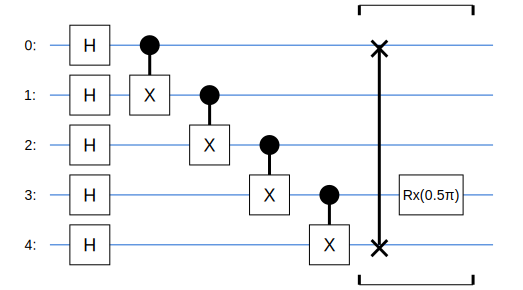

In [4]:
SVGCircuit(circuit)



The circuit that we implemented has the following components:

Five qubits: We start by defining 5 qubits using the LineQubit.range(5) function in Cirq. These qubits are labeled 0 to 4.

Hadamard gates: Next, we apply a Hadamard gate to each qubit using a loop. The Hadamard gate is a common single-qubit gate in quantum computing that puts a qubit in a superposition state. It has the matrix representation:

H = 1/sqrt(2) * [[1, 1], [1, -1]]

CNOT gates: After applying the Hadamard gates, we apply a CNOT gate between each pair of neighboring qubits. The CNOT gate is a two-qubit gate that performs a NOT operation on the second qubit (target qubit) if the first qubit (control qubit) is in the state |1>. If the control qubit is in the state |0>, then the target qubit is not affected. In our circuit, we apply CNOT gates on qubits (0, 1), (1, 2), (2, 3), and (3, 4).

SWAP gate: We then apply a SWAP gate between qubits 0 and 4, which swaps the states of these two qubits.

X gate with pi/2 rotation: Finally, we apply an X gate with a pi/2 rotation (i.e., a rotation of 90 degrees) on qubit 1. The X gate is another common single-qubit gate that is equivalent to a classical NOT operation. The X gate with a pi/2 rotation has the matrix representation:

X^0.5 = [[(1+i)/2, (1-i)/2], [(1-i)/2, (1+i)/2]]

This circuit is a simple example of a quantum circuit that uses basic quantum gates to manipulate qubits.



In [1]:
pip install qiskit

  Using cached qiskit-0.42.0-py3-none-any.whl
  Using cached qiskit_aer-0.12.0-cp310-cp310-win_amd64.whl (9.6 MB)
  Using cached qiskit_ibmq_provider-0.20.2-py3-none-any.whl (241 kB)
  Using cached qiskit_terra-0.23.2-cp310-cp310-win_amd64.whl (4.6 MB)
  Using cached requests_ntlm-1.1.0-py2.py3-none-any.whl (5.7 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
from qiskit import QuantumCircuit, Aer, execute
import math

# Create a 4-qubit quantum circuit
qc = QuantumCircuit(4)

# Apply Hadamard gate to the first qubit
qc.h(0)

# Rotate the second qubit by pi/3 around X
qc.rx(math.pi/3, 1)

# Apply Hadamard gate to the third and fourth qubits
qc.h(2)
qc.h(3)

# Perform a swap test between qubits 1 and 2, and qubits 3 and 4
qc.h(1)
qc.cx(1, 2)
qc.cx(3, 2)
qc.h(1)
qc.measure_all()

# Simulate the circuit using the Aer simulator
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator).result()

# Print the measurement results
print(result.get_counts(qc))


{'1100': 85, '1000': 104, '0000': 83, '1001': 107, '0001': 96, '1101': 91, '0100': 100, '0101': 97, '0011': 32, '1010': 38, '0110': 29, '0010': 31, '1111': 32, '1011': 37, '0111': 32, '1110': 30}


The output of the circuit will be a dictionary of counts of the possible measurement outcomes. Since we are measuring all qubits in the circuit, there will be 2^4 = 16 possible measurement outcomes, each represented by a binary string of 4 bits.

The specific measurement outcomes and their probabilities will be determined by the quantum state of the qubits after the circuit has been executed. Since the circuit includes random operations (such as the measurement basis of the Hadamard gates), the measurement outcomes will not be deterministic and may vary with each execution of the circuit.

However, the measurement outcomes should be indicative of the similarity between the states of the qubits involved in the swap test. If the states of the qubits are identical, then the probability of measuring the state |0000> (i.e., all qubits are in the 0 state) should be close to 1. If the states of the qubits are orthogonal, then the probability of measuring |0000> should be close to 0.